In [6]:
from vnstock3 import Vnstock

### Quote

In [2]:
from vnstock3 import Vnstock
stock = Vnstock().stock(symbol='ACB', source='VCI')

2024-09-08 22:36:40,519 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [3]:
stock.quote.intraday(page_size=10000, last_time='2024-09-07 14:29:52')['match_type'].value_counts()

match_type
Buy        1003
Sell        840
ATO/ATC       2
Name: count, dtype: int64

In [4]:
df = stock.quote.intraday(page_size=10000, last_time='2024-09-07 14:29:52')

In [49]:
df = stock.quote.history(start='2024-01-01', end='2024-09-06', interval='1D')

In [50]:
df

,time,open,high,low,close,volume
0,2024-01-02,20.12,20.79,20.12,20.54,13896933
1,2024-01-03,20.58,21.00,20.37,21.00,9817807
2,2024-01-04,21.17,21.55,21.08,21.25,23605373
3,2024-01-05,21.25,21.38,21.04,21.38,9282598
4,2024-01-08,21.59,21.63,21.17,21.29,12398885
...,...,...,...,...,...,...
163,2024-08-29,24.55,24.90,24.55,24.65,8588000
164,2024-08-30,24.65,24.80,24.65,24.80,4483800
165,2024-09-04,24.50,24.70,24.45,24.65,5632900
166,2024-09-05,24.65,24.70,24.45,24.50,3534700


In [15]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
import pandas as pd
from langchain_openai import OpenAI
from langchain.agents.agent_types import AgentType
from langchain_community.callbacks import get_openai_callback



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Giả sử df đã được định nghĩa như trong ví dụ\n# Chuyển đổi cột 'time' thành kiểu datetime\ndf['time'] = pd.to_datetime(df['time'])\n\n# Vẽ biểu đồ giá close\nplt.figure(figsize=(12, 6))\nplt.plot(df['time'], df['close'], marker='o', linestyle='-', color='b')\nplt.title('Biểu đồ giá đóng cửa (Close) theo thời gian')\nplt.xlabel('Thời gian')\nplt.ylabel('Giá đóng cửa')\nplt.grid()\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n\n# Tìm giá thấp nhất và cao nhất\nmin_close = df['close'].min()\nmax_close = df['close'].max()\nmin_close, max_close"}`




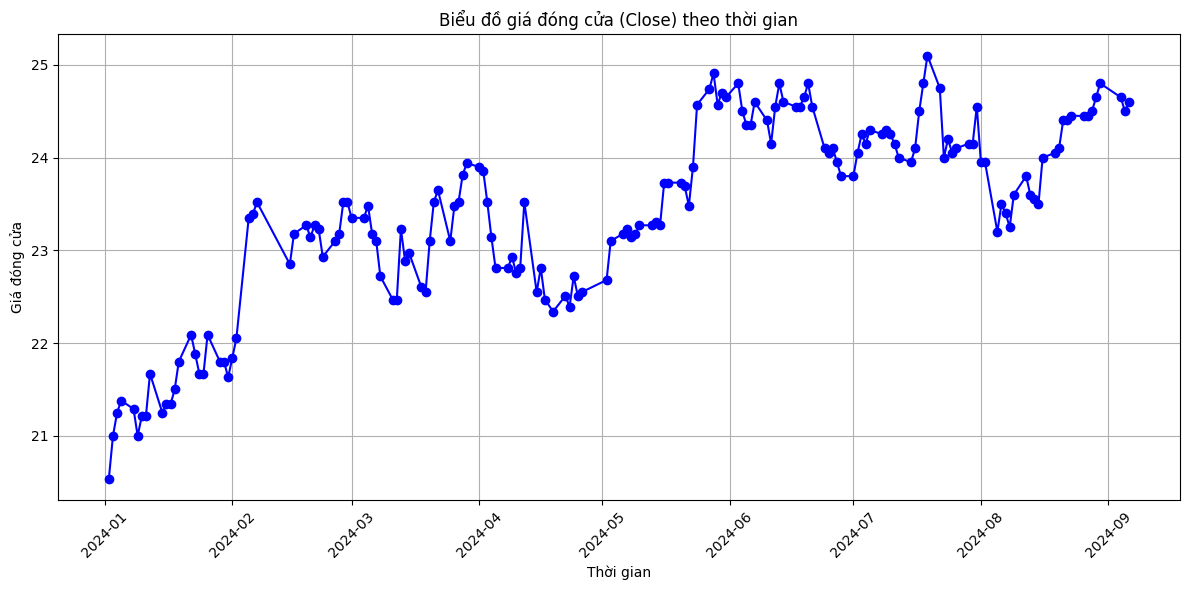

(20.54, 25.1)Biểu đồ giá đóng cửa (Close) theo thời gian đã được vẽ. 

Giá thấp nhất là **20.54** và giá cao nhất là **25.1**.

> Finished chain.
Tokens Used: 1321
	Prompt Tokens: 1075
	Completion Tokens: 246
Successful Requests: 2
Total Cost (USD): $0.00030885


In [58]:

agent = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0, model="gpt-4o-mini"),
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True
)

with get_openai_callback() as cb:
    agent.agent.stream_runnable = False
    response = agent.run("Hãy vẽ biểu đồ thể hiện giá close biến động trong ngày và cho tôi biết giá thấp nhất và cao nhất.")
    print(cb)

### Trading

In [10]:
stock.listing.all_symbols()

,ticker,organ_name
0,A32,Công ty Cổ phần 32
1,AAA,Công ty Cổ phần Nhựa An Phát Xanh
2,AAM,Công ty Cổ Phần Thủy Sản MeKong
3,AAS,Công ty Cổ phần Chứng khoán SmartInvest
4,AAT,Công ty Cổ phần Tập đoàn Tiên Sơn Thanh Hóa
...,...,...
1593,XPH,Công ty Cổ phần Xà phòng Hà Nội
1594,YBC,Công ty Cổ phần Xi măng và Khoáng sản Yên Bái
1595,YBM,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái
1596,YEG,Công ty Cổ phần Tập đoàn Yeah1


In [12]:
stock.listing.symbols_by_group('HOSE')

0      AAA
1      AAM
2      AAT
3      ABR
4      ABS
      ... 
411    VTB
412    VTO
413    VTP
414    YBM
415    YEG
Name: symbol, Length: 416, dtype: object

In [32]:
df = stock.quote.history(start='2024-06-01', end='2024-08-20', interval='15m')
df

,time,open,high,low,close,volume
0,2024-06-03 09:15:00,24.85,24.95,24.70,24.75,392800
1,2024-06-03 09:30:00,24.75,24.80,24.60,24.65,1016600
2,2024-06-03 09:45:00,24.65,24.70,24.60,24.60,544000
3,2024-06-03 10:00:00,24.60,24.75,24.60,24.70,543600
4,2024-06-03 10:15:00,24.70,24.75,24.65,24.70,497300
...,...,...,...,...,...,...
7506,2024-08-20 13:45:00,24.10,24.25,24.10,24.25,721700
7507,2024-08-20 14:00:00,24.25,24.30,24.15,24.15,496700
7508,2024-08-20 14:15:00,24.15,24.20,24.15,24.15,634500
7509,2024-08-20 14:30:00,NaN,NaN,NaN,NaN,0


In [17]:
# Bước giá và khối lượng giao dịch: realtime
stock.quote.price_depth('ACB')

,price,acc_volume,acc_buy_volume,acc_sell_volume,acc_undefined_volume
0,24300,78000,78000,0,0
1,24250,425700,155000,270700,0
2,24200,426900,340000,86900,0
3,24150,1032200,437200,595000,0
4,24100,1757700,952400,482600,322700
5,24050,1368500,577100,758800,32600
6,24000,324000,21300,302700,0


In [28]:
company = Vnstock().stock(symbol='ACB', source='TCBS').company

In [1]:
company.shareholders()

NameError: name 'company' is not defined